In [15]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'GsLenna')

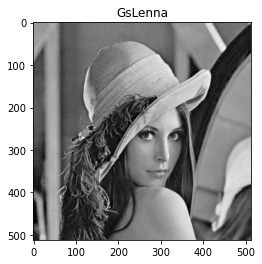

In [26]:
image=cv2.imread('Lenna_(test_image).png')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.title('GsLenna')

In [32]:
import numpy as np
smallest = np.amin(image)
biggest = np.amax(image)
print(smallest)
print(biggest)

3
255


In [34]:
# counting the number of pixels
number_of_white_pix = np.sum(image == 255)
number_of_black_pix = np.sum(image == 0)
number_of_lowest_pix = np.sum(image == 3)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)
print('Number of lowest pixels:',number_of_lowest_pix)

Number of white pixels: 112
Number of black pixels: 0
Number of lowest pixels: 11


In [ ]:
import math

# read image
hh, ww = image.shape[:2]

# convert to hsv   hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# threshold image
lower_red = np.array([0, 0, 225])
upper_red = np.array([255, 255, 255])
thresh = cv2.inRange(hsv, lower_red, upper_red)

# apply close and open morphology to smooth
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(morph, None, None, None, 8, cv2.CV_16U)

# get all areas from stats[label_start_id:label_stop_id, area_flag] 
areas = stats[0:, cv2.CC_STAT_AREA]

# draw labels and get centroids and draw centroids
result = image.copy()
pts = []
for i in range(0, nlabels):
    if areas[i] <= ww*hh/5 :
        # labels start at 1 not 0
        result[labels == i+1] = (0,255,255)
        pt = centroids[i]
        pts.append(pt)
        cx = pt[0]
        cy = pt[1]
        x = int(round(cx))
        y = int(round(cy))
        # draw small square at centroids
        result[y-2:y+3,x-2:x+3] = (0,255,0)
        print('centroid =',cx,",",cy)

number = len(pts)   
for i in range(number-1):
    pt1 = pts[i]
    x1 = pt1[0]
    y1 = pt1[1]
    pt2 = pts[i+1]
    x2 = pt2[0]
    y2 = pt2[1]
    dist = math.sqrt( (x2-x1)**2 + (y2-y1)**2 )
    print('distance =', dist)
    print('')

#save images
cv2.imwrite('red_spots_thresh2.jpg',thresh)
cv2.imwrite('red_spots_morph2.jpg',morph)
cv2.imwrite('red_spots_centroids2.jpg',result)

# show images
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

centroid = 41.809119414685135 , 224.29775280898878
centroid = 428.6815042210284 , 33.79508825786646
centroid = 369.89171974522293 , 28.784501061571124
centroid = 276.5100081699346 , 102.3343545751634
centroid = 366.3368402897551 , 137.25094860296653
centroid = 393.3133514986376 , 82.3841961852861
centroid = 131.71389080856946 , 182.8666205943331
centroid = 373.58666666666664 , 198.09333333333333
centroid = 310.00845070422537 , 281.26543878656554
centroid = 230.9889705882353 , 260.6029411764706
centroid = 115.36094674556213 , 266.94674556213016
centroid = 276.9340659340659 , 272.4945054945055
centroid = 474.15257469802924 , 366.91710108073744
centroid = 262.1876865671642 , 314.56529850746267
centroid = 158.6787878787879 , 358.76363636363635
centroid = 319.89368258859787 , 461.49592780101256
distance = 431.23254437347924

distance = 59.00292147651109

distance = 118.8685198385225

distance = 96.374417285838

distance = 61.139943391092565

distance = 280.2338228131186

distance = 242.3515

In [17]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

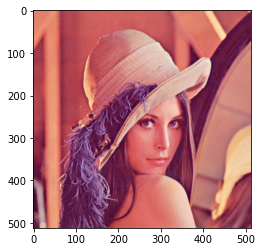

In [18]:
plt.imshow(image)

In [19]:
px=image[100,100]
print(px)

[178  68  78]


In [20]:
image[100:150,100:150,0]=0
image[100:150,100:150,1]=0

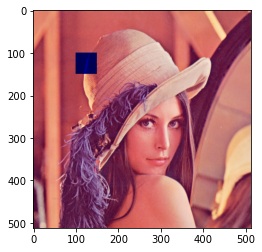

In [21]:
plt.imshow(image)

In [23]:
#accessing pixel value, 0 for red,1 for Green and 2 for Blue
px=image.item(100,100,0)
print(px)

0


In [24]:
#changing the pixel value
image.itemset((100,100,0),178)

In [25]:
px=image.item(100,100,0)
print(px)

178


In [ ]:
import numpy as np

max_channels = np.amax([np.amax(img[:,:,0]), np.amax(img[:,:,1]), np.amax(img[:,:,2])])

print(max_channels)